- 구현이란, 머리속에 있는 알고리즘을 소스코드로 바꾸는 과정입니다.
- 흔히 풀이를 떠올리기는 것은 쉽지만 소스코드로 옮기기 어려운 문제
- 구현 유형의 예시는 다음과 같다
    - 알고리즘은 간단한데 코드가 지나치게 긴 문제
    - 실수 연산을 다루고, 특정 소수점 자리까지 출력하는 문제
    - 문자열을 특정한 기준에 따라서 끊어 처리해야 하는 문제
    - 적절한 라이브러리를 찾아서 사용해야하는 문제 ( ex) itertools library )
    

In [1]:
# 일반적으로 알고리즘 문제에서의 2차원 공간은 행렬의 의미로 사용
for i in range(5):
    for j in range(5):
        print('(',i,',',j,')',end = ' ')
    print()

( 0 , 0 ) ( 0 , 1 ) ( 0 , 2 ) ( 0 , 3 ) ( 0 , 4 ) 
( 1 , 0 ) ( 1 , 1 ) ( 1 , 2 ) ( 1 , 3 ) ( 1 , 4 ) 
( 2 , 0 ) ( 2 , 1 ) ( 2 , 2 ) ( 2 , 3 ) ( 2 , 4 ) 
( 3 , 0 ) ( 3 , 1 ) ( 3 , 2 ) ( 3 , 3 ) ( 3 , 4 ) 
( 4 , 0 ) ( 4 , 1 ) ( 4 , 2 ) ( 4 , 3 ) ( 4 , 4 ) 


In [2]:
# 시뮬레이션 및 완전 탐색 문제에서는 2차원 공간에서의 방향 벡터가 자주 사용 됨
# 동, 북, 서, 남
dx = [0, -1, 0, 1]
dy = [1, 0, -1, 0]

# 현재위치
x,y = 2,2 

for i in range(4):
    # 다음 위치
    nx = x + dx[i]
    ny = y + dy[i]
    print(nx,ny)

2 3
1 2
2 1
3 2


#### 예시 문제 상화좌우 문제설명
- 여행가 A는 N x N 크기의 정사각형 공간 위에 서 있습니다. 이 공간은 1 x 1 크기의 정사각형으로 나누어져 있습니다. 가장 왼쪽 위 좌표는 (1,1) 이며, 가장 오른쪽 아래 좌표는 (N,N)에 해당합니다. 여행가 A는 상, 하, 좌, 우 방향으로 이동할 수 있으며, 시작 좌표는 항상 (1,1)입니다. 우리 앞에는 여행가 A가 이동할 계획이 적힌 계획서가 놓여 있습니다.
- 계획서에는 하나의 죽에 띄어쓰기를 기준으로 하여 L,R,U,D 중 하나의 문자가 반복적으로 적혀 있습니다
- 이때 여행가 a가 n x n 크기의 정사각형 공간을 벗어나는 움직임은 무시됩니다. 예를 들어 (1,1)의 위치에서 L 혹은 U를 만나면 무시됩니다. 다음은 N=5인 지도와 계획서입니다.

In [8]:
# 혼자 해보기
n = int(input())
move = list(input().split(" "))
array = [[0] * n for _ in range(n)]
array

5
R R R U D D


[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [14]:
point = [1,1]
for i in move:
    if i == 'L' and point[1] != 1:
        point[1] += 1
    elif i == 'R' and point[1] != n:
        point[1] += 1
    elif i == 'U' and point[0] != 1:
        point[0] += 1
    elif i == 'D' and point[0] != n:
        point[0] += 1
print(point)

[3, 4]


In [12]:
point[1]

1

- 문제 해결 아이디어
- 명령에 따라 개체를 차례대로 이동시킨다는 점에서 시뮬레이션 유형으로도 분류됨
    - 다만 코딩 테스트에서 시뮬레이션 유형, 구현 유형, 완전 탐색 유형은 서로 유사한 점이 많다
    

In [ ]:
# 정답 예시

n = int(input())
x, y = 1,1
plans = input().split()

# L,R,U,D에 따른 이동 방향
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
move_types = ['L', 'R', 'U','D']

# 이동 계획을 하나씩 확인하기
for plan in plans:
    # 이동 후 좌표 구하기
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
    #공간을 벗어나는 경우 무시
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
    # 이동 수행
    x,y = nx, ny
    
print(x,y)

#### 시각 문제
- 정수 N이 입력되면 00시 00분 00초부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수를 구하는 프로그램을 작성하세여. 예를 들어 1을 입력했을 때 다음은 3이 하나라도 포함되어 있으므로 세어야 하는 시각입니다.
    - 00시 00분 03초
    - 00시 13분 30초
- 반면에 다음은 3이 하나도 포함되어 있지 않으므로 세면 안되는 시각입니다.
    - 00시 02분 55초
    - 01시 27분 45초


#### 풀이 전략 1분마다, 1시간마다 구해서 곱하기?

In [2]:
n = int(input())

1


In [17]:
# 초가 출력되는 경우
sec = 0
s_count = 0
while sec <=60:
    if '3' in str(sec):
        s_count += 1
        print(sec)
    sec += 1

3
13
23
30
31
32
33
34
35
36
37
38
39
43
53


In [ ]:
# 분이 3인 경우
min = 0
m_count = 0
while min <=60:
    if '3' in str(min):
        m_count += 60
        print(min)
    min += 1

In [38]:
n = int(input())
clock = 0
count = 0
min = 0
sec = 0
for i in range(1,n+1):
    if i%3==0:
        count += 3600
        continue
    else:
        while min <=60:
            if '3' in str(min):
                count += 60
            else:
                sec = 0
                s_count = 0
                while sec <=60:
                    if '3' in str(sec):
                        count += 1
                    sec += 1
            min += 1
print(count)        

5
5190


In [31]:
1%3

1

In [41]:
# 답안 예시
h = int(input())

count = 0
for i in range(h+1):
    for j in range(60):
        for k in range(60):
            # 매 시각 안에 3이 포함되어 있다면 카운트 증가
            if '3' in str(i) + str(j) + str(k):
                count +=1
print(count)

5
11475


#### 왕실의 나이트 : 문제 설명
- 행복 왕국의  왕실 정원은 체스판과 같은 8 x 8 좌표 평면입니다. 왕실 정원의 특정한 한 칸에 나이트가 서있습니다. 나이트는 매우 충성스러운 신하로서 매일 무술을 연마합니다.
- 나이트는 말을 타고 있기 때문에 이동을 할 때는 L자 형태로만 이동할 수 있으며 정원 밖으로는 나갈 수 없습니다.
- 나이트는 특정 위치에서 다음과 같은 2가지 경우로 이동할 수 있습니다.
1. 수평으로 두 칸 이동한 뒤에 수직으로 한 칸 이동하기
2. 수직으로 두 칸 이동한 뒤에 수평으로 한 칸 이동하기

- 이처럼 8x8 좌표 평면상에서 나이트의 위치가 주어졌을 때 나이트가 이동할 수 있는 경우의 수를 출력하는 프로그램을 작성하세요. 왕실의 정원에서 행 위치를 표현할 때는 1부터 8로 표현하며, 열 위치를 표현할때는 a부터 h로 표현합니다.
    - c2에 있을때 이동할 수 있는 경우의 수는 6가지입니다.
    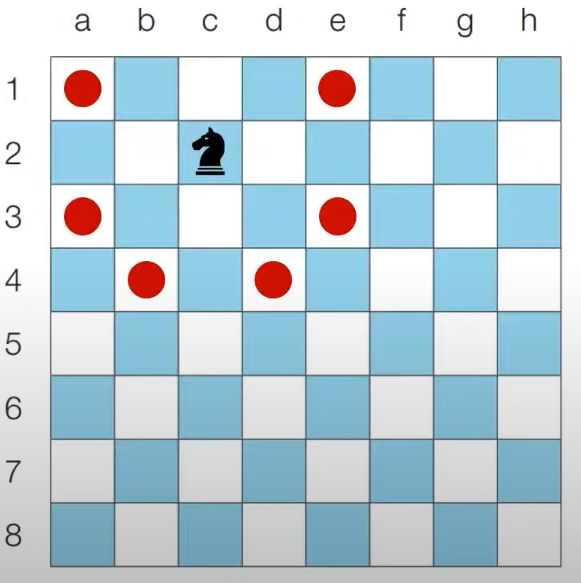
- 입력
    - 첫째 줄에 8x8 좌표 평면상에서 현재 나이트가 위치한 곳의 좌표를 나타내는 두 문자로 구성된 문자열이 입력된다. 입력 문자는 a1 처럼 열과 행으로 이뤄진다.
- 출력
    - 첫째 줄에 나이트가 이동할 수 있는 경우의 수를 출력하시오

In [47]:
# 정답 예시

# 현재 나이트의 위치 입력받기
input_data = input()
row = int(int(input_data[1]))
column = int(ord(input_data[0]))- int(ord('a'))+ 1

# 나이트가 이동할 수 있는 8가지 방향 정의
steps = [(-2,-1), (-1,-2), (1,-2), (2,-1), (2,1), (1,2), (-1,2), (-2,1) ]

a5


In [48]:
# 8가지 방향에 대하여 각 위치로 이동 가능 한지 확인
res = 0
for step in steps:
    # 이동하고자 하는 위치 확인
    next_row = row + step[0]
    next_column = column + step[1]
    # 해당 위치로 이동이 가능하다면 카운트 증가
    if next_row >=1 and next_row <=8 and next_column >=1 and next_column <=8:
        res +=1
print(res)

4


#### 문자열 재정렬
- 알파벳 대문자와 숫자(0~9)로만 구성된 문자열이 입력으로 주어집니다. 이때 모든 알파벳을 오름차순으로 정렬하여 이어서 출력한 뒤에, 그 뒤에 모든 숫자를 더한 값을 이어서 출력합니다.
- 예를 들어 K!KA5CB7이라는 값이 들어오면 ABCKK13을 출력합니다.
- 입력
    - 첫째 줄에 하나의 문자열 S가 주어집니다.
- 출력
    - 정답을 출력

In [49]:
s = input()

K1KA5CB7


In [65]:
s = input()
sor = sorted(s)
numlst = ['0','1','2','3','4','5','6','7','8','9']
sum = 0
res = []
for i in sor:
    if i in numlst :
        sum += int(i)
    else:
        res.append(i)
res.append(sum)
res = ''.join(map(str, res))
print(res)

AJKDLSI4122K4JSJ9D
ADDIJJJKKLSS22


In [66]:
# 정답 예시
data = input()
result = []
value = 0

# 문자를 하나씩 확인하며
for x in data:
    # 알파벳인 경우 결과 리스트에 삽입
    if x.isalpha():
        result.append(x)
    # 숫자는 따로 더하기
    else:
        value += int(x)

# 알파벳을 오름차순으로 정렬
result.sort()

# 숫자가 하나라도 존재하는 경우 가장 뒤에  삽입
if value != 0:
    result.append(str(value))
    
# 최종 결과 출력 (리스트를 문자열로 변환하여 출력)

print(''.join(result))

AJKDLSI4122K4JSJ9D
ADDIJJJKKLSS22


In [62]:
res

['A', 'B', 'C', 'K', 'K', 13]